In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [13]:
csv = r"C:\Users\Andre Vaz\OneDrive\Desktop\IH DATA\Week 4 Descriptive Stats\Lab Univariate\lab-eda-bivariate\amz_uk_price_prediction_dataset.csv"
df = pd.read_csv(csv)


In [14]:
df.head(10)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
5,6,B09B97WSLF,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
6,7,B09B9615X2,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
7,8,B01MTB55WH,Anker Soundcore 2 Portable Bluetooth Speaker w...,4.7,103673,39.99,False,0,Hi-Fi Speakers
8,9,B016MO90GW,"Bluetooth Speaker, Anker Soundcore Speaker Upg...",4.7,29909,29.99,False,0,Hi-Fi Speakers
9,10,B09ZQF5GZW,RIENOK Bluetooth Speaker Portable Wireless Blu...,4.5,16014,29.99,False,0,Hi-Fi Speakers


In [15]:
df.shape

(2443651, 9)

### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency? 

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?
 

In [16]:
pd.set_option("display.max_rows", 100)

In [17]:
pt_category = df["category"].value_counts(normalize=True)
pt_category

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
                                            ...   
Alexa Built-In Devices                    0.000044
Motorbike Chassis                         0.000044
Plugs                                     0.000044
Smart Home Security & Lighting            0.000043
Smart Speakers                            0.000022
Name: proportion, Length: 296, dtype: float64

In [18]:
df.isna().sum()

uid                  0
asin                 0
title                0
stars                0
reviews              0
price                0
isBestSeller         0
boughtInLastMonth    0
category             0
dtype: int64

In [19]:
# 1 .- Generate a frequency table for the product `category`.
ft_category = df["category"].value_counts()
ft_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [20]:
#2.- Which are the top 5 most listed product categories?
top5_category = df["category"].value_counts().head(5)
top5_category

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*

C:\Users\Andre Vaz\AppData\Local\Temp\ipykernel_13744\3450832648.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top5_category.index, y= top5_category.values, palette= "Set1");


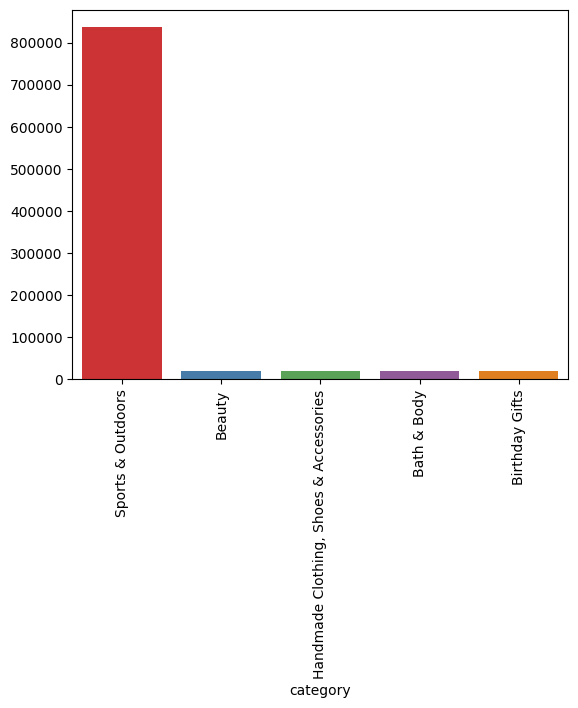

In [21]:
sns.barplot(x=top5_category.index, y= top5_category.values, palette= "Set1");
plt.xticks(rotation = 90)
plt.show()

<Axes: ylabel='count'>

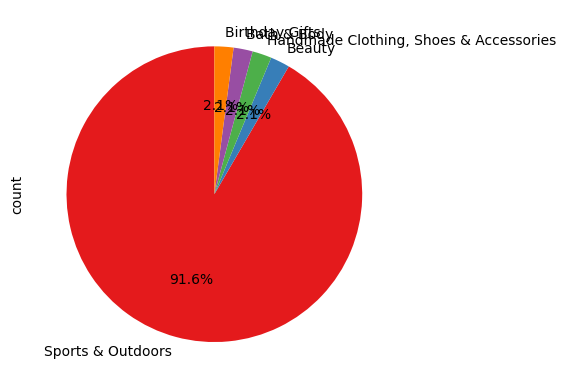

In [22]:
#For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?"Labor hours 2022"

top5_category.plot.pie(autopct= "%1.1f%%",startangle = 90, colors =sns.color_palette("Set1"))

In [23]:
#BUSSINES QUESTION#

"""
In an initial inspection, it's evident that the category "Sports & Outdoors" holds significant weight, representing 35% of the total listings among 296 categories. 
However, it's notable that this category also appears to be the most ambiguous within the "category" column. 
To enhance the clarity of the data, it would be beneficial to standardize the values within the "category" column to a similar scale. 
One approach could involve introducing a "sub-category" column, allowing for more granularity in categorization while retaining a broader classification in the original "category" column.
"""

'\nIn an initial inspection, it\'s evident that the category "Sports & Outdoors" holds significant weight, representing 35% of the total listings among 296 categories. \nHowever, it\'s notable that this category also appears to be the most ambiguous within the "category" column. \nTo enhance the clarity of the data, it would be beneficial to standardize the values within the "category" column to a similar scale. \nOne approach could involve introducing a "sub-category" column, allowing for more granularity in categorization while retaining a broader classification in the original "category" column.\n'

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

In [24]:
#1
mean_price = df["price"].mean().round(3)
median_price = df["price"].median()
mode_price = df["price"].mode()[0].round(3)

print (f"mean : {mean_price} \nmedian : {median_price},\nmode : {mode_price}")

# the average point is 89,244 , and the mode 9.99 showing that are outliers pushing the median way above the mode price. 

mean : 89.244 
median : 19.09,
mode : 9.99


In [25]:
2#
max_price = df["price"].max()
min_price = df["price"].min()
var_price = df["price"].var()
std_price = df["price"].std()
range_price = max_price - min_price
q_price = df["price"].quantile([0.25, 0.5, 0.75])
Q1 = q_price.loc[0.25]
Q3 = q_price.loc[0.75]
IQR = Q3 - Q1


var_price, std_price, range_price, IQR


#All dispersion factors shows that there is a huge dispersion of values. 

(119445.48532254907, 345.60886175349884, 100000.0, 36.0)

<Axes: xlabel='price', ylabel='Count'>

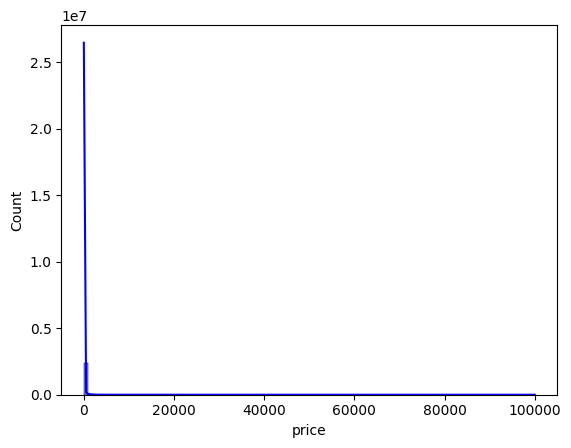

In [26]:
sns.histplot(df['price'], kde=True, bins=100, color="blue")

In [27]:
# It's hard to visualize at wich precise price the 55% prices of the products falls on. Otherwise is easy to check there is a HUGE despersion of prices between the majoraty of prices.
# This will be solved by removing the outliers from the equation, basicly flaging the outliers in a different collumn, so it can be removed if the necessary or display 2 different analysis ( with and without). 

<Axes: ylabel='price'>

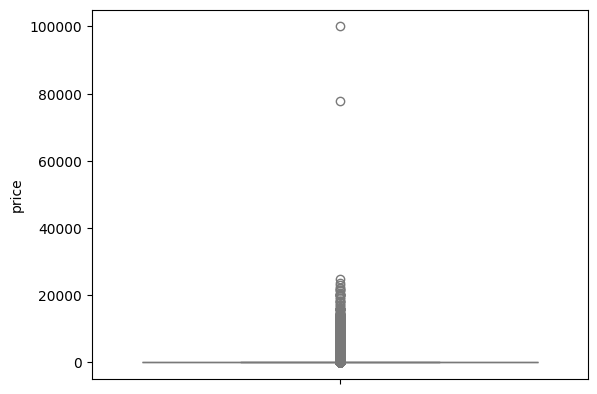

In [28]:
sns.boxplot(data = df['price'], color="lightblue")

In [29]:
"""
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

The dataset contains a wide range of product prices, ranging from 0 to 100000. With such diversity in product types and markets, it's natural to observe a high dispersion in prices.
The mean price is $89.24, indicating the average price across all products.
The standard deviation of $345.61 suggests considerable variability in prices around the mean.
The prices span from a minimum of $0 to a maximum of $100000, reflecting the broad spectrum of products being sold.
Interestingly, the majority of prices fall within a narrower range:

55% of the products have prices between $9.99 and $45.99.
This finding highlights a concentration of prices within this range, despite the overall wide dispersion.

"""

"\nBusiness Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?\n\nThe dataset contains a wide range of product prices, ranging from 0 to 100000. With such diversity in product types and markets, it's natural to observe a high dispersion in prices.\nThe mean price is $89.24, indicating the average price across all products.\nThe standard deviation of $345.61 suggests considerable variability in prices around the mean.\nThe prices span from a minimum of $0 to a maximum of $100000, reflecting the broad spectrum of products being sold.\nInterestingly, the majority of prices fall within a narrower range:\n\n55% of the products have prices between $9.99 and $45.99.\nThis finding highlights a concentration of prices within this range, despite the overall wide dispersion.\n\n"

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?

Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?


In [30]:
            ###MEASURES OF CENTRALITY###

dfmean = df["stars"].mean()
dfmedian = df["stars"].median()
dfmode = df["stars"].mode()[0]
df["stars"].value_counts(normalize=True)
dfmean, dfmedian, dfmode 

(2.152836472966065, 0.0, 0.0)

In [31]:
"""

Upon analyzing the central tendency measures, we note that the median rating stands at 2.1 stars per product.
However, this figure is notably influenced by the prevalence of 0-star ratings (mode).
Consequently, the median tends to skew towards lower values. Solely relying on central tendency metrics,
we face limitations in drawing definitive conclusions. 
It remains unclear whether a 0-star rating truly reflects the absence of feedback or signifies an actual rating. 


"""

'\n\nUpon analyzing the central tendency measures, we note that the median rating stands at 2.1 stars per product.\nHowever, this figure is notably influenced by the prevalence of 0-star ratings (mode).\nConsequently, the median tends to skew towards lower values. Solely relying on central tendency metrics,\nwe face limitations in drawing definitive conclusions. \nIt remains unclear whether a 0-star rating truly reflects the absence of feedback or signifies an actual rating. \nFurther examination beyond central tendency measures is necessary for a more nuanced understanding.\n\n'

In [32]:
bins = [0, 1.25, 2.5, 3.75, df['stars'].max()]
labels = ['Low', 'Medium', 'High', 'Very High']
df['stars_cat'] = pd.cut(df['stars'], bins=bins, labels=labels, include_lowest=True)
df['stars_cat'].value_counts()

stars_cat
Low          1234151
Very High    1095804
High          103252
Medium         10444
Name: count, dtype: int64

In [33]:
                    ###MEASURES OF DISPERSION###
            
max_stars = df["stars"].max()
min_stars = df["stars"].min()
var_stars = df["stars"].var()
std_stars = df["stars"].std()
range_stars = max_stars - min_stars
q_stars = df["stars"].quantile([0.25, 0.5, 0.75])
Q1 = q_stars.loc[0.25]
Q3 = q_stars.loc[0.75]
IQR = Q3 - Q1


var_stars, std_stars, range_stars, IQR





var_stars, std_stars, range_stars, IQR

(4.817434029796862, 2.1948653785134207, 5.0, 4.4)

In [34]:
###MEASURES OF DISPERSION 


skewness_stars = df["stars"].skew()
kurtosis_price = df["stars"].kurtosis()

skewness_stars,kurtosis_price

(0.08120735761080985, -1.9260061280432985)

<Axes: xlabel='stars', ylabel='Count'>

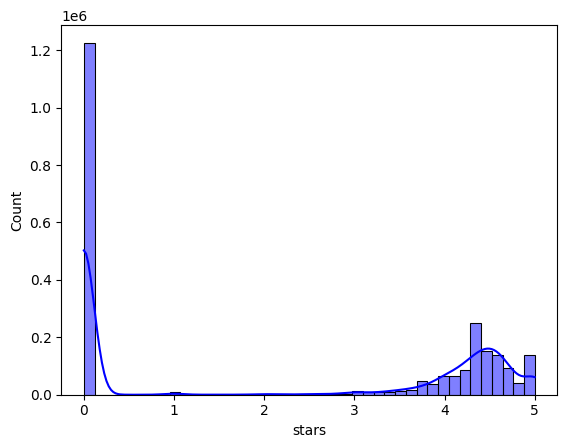

In [39]:
sns.histplot(df['stars'], kde=True, bins=42, color="blue")

In [40]:
###BUSSINESS QUESTION - How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?


"""
    In summary, the presence of two polarized cluster shows that opinions vary widely on Amazon Uk, with products meeting or missing expectations,
    the cluster between 4 and 5 ratings, show us that clients when are happy tend to give higher ratings.
    The high volume of 0-star ratings might not only reflect customer unstatisfaction but could also be due to products not receiving any ratings, 
    possibly because of low visibility or lack of purchases.
"""

'\n    In summary, significant number of products either not rated or rated very lowly,\n    and another cluster of products rated highly.\n    This pattern might suggest distinct groups of products in terms of customer satisfaction and understanding the characteristics of highly rated vs poorly rated or unrated products\n    \n'

In [41]:
df["stars"].value_counts().count()

42